# Variables

In [15]:
from __future__ import print_function
import torch
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from datetime import date
date.today()

datetime.date(2017, 9, 26)

In [3]:
author = "kyubyong. https://github.com/Kyubyong/pytorch_exercises"

In [4]:
torch.__version__

'0.2.0_3'

In [5]:
np.__version__

'1.13.0'

NOTE on notation

    _x, _y, _z, ...: NumPy 0-d or 1-d arrays
    _X, _Y, _Z, ...: NumPy 2-d or higer dimensional arrays
    x, y, z, ...: 0-d or 1-d tensors
    X, Y, Z, ...: 2-d or higher dimensional tensors


In [6]:
from torch.autograd import Variable

## Variables 

Q0. Create a variable `X` of the size (3, 2), filled with 1's.

In [63]:
X = Variable(torch.ones(3, 2))
print(X)

Variable containing:
 1  1
 1  1
 1  1
[torch.FloatTensor of size 3x2]



Q1. Get the tensor of Variable X.

In [66]:
X = Variable(torch.randn(3, 3))
Y = X.data
print(Y)


-1.6672 -0.7731 -1.2038
-1.6198  1.5626 -0.2577
-0.2160 -0.6591 -0.2372
[torch.FloatTensor of size 3x3]



Q2. Complete the code.

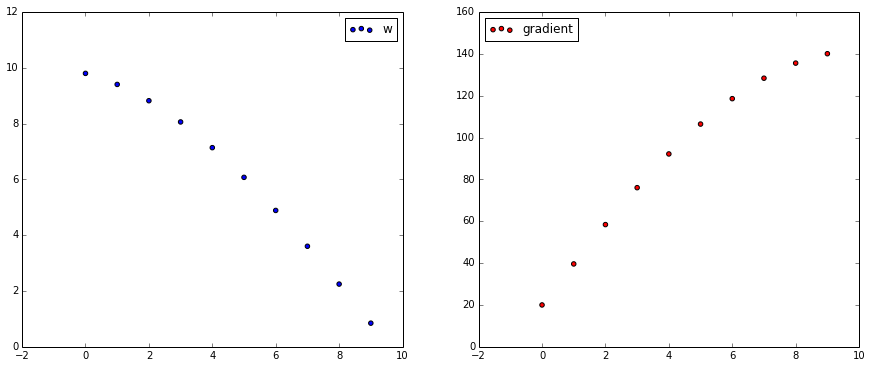

In [54]:
# Create a trainable variable `w` of scalar 10.
w = Variable(torch.ones(1)*10, requires_grad=True)

gs, ws, grads = [], [], []
for i in range(10):
    y = w ** 2 + 2
    
    # apply backpropagation to y.
    y.backward()
    
    w.data -= 0.01 * w.grad.data
    gs.append(i)
    ws.append(w.data[0])
    grads.append(w.grad.data[0])

plt.figure(figsize=(15,6))
ax=plt.subplot(1, 2, 1)
ax.scatter(gs, ws, c="b", label="w")
ax.legend(loc="upper right")
ax=plt.subplot(1, 2, 2)
plt.scatter(gs, grads, c="r", label="gradient")
plt.legend(loc="upper left")
plt.show()


Q3. Complete the code. <br>This is adapted from `http://pytorch.org/tutorials/beginner/examples_autograd/two_layer_net_autograd.html`.

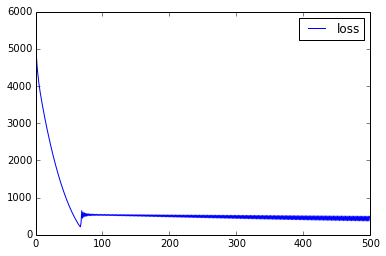

In [62]:
# Untrainable variables
# Create untrainable variables X and Y.
X = Variable(torch.randn(64, 1000), requires_grad=False)
Y = Variable(torch.randn(64, 10), requires_grad=False)

# Trainable Variables
w1 = Variable(torch.randn(1000, 100), requires_grad=True)
w2 = Variable(torch.randn(100, 10), requires_grad=True)

losses = []
for t in range(500):
    Y_pred = X.matmul(w1).clamp(min=0).matmul(w2)
    
    # Apply L2 loss to Y pred and Y.
    loss = (Y_pred - Y).norm(p=2)
    losses.append(loss.data[0])

    loss.backward()
    
    w1.data -= 1e-3 * w1.grad.data
    w2.data -= 1e-3 * w2.grad.data
    

    

    # Manually zero the gradients after updating weights
    w1.grad.data.zero_()
    w2.grad.data.zero_()

# plot
plt.figure()
plt.plot(losses, label="loss")
plt.legend()
plt.show()
